# A simple example using integrated path stability selection (IPSS)

## Install ipss and import libraries

In [ ]:
%pip install -q ipss

from ipss import ipss
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

## Generate data
1. Generate coefficient vector $\beta$ with `n_true` randomly located nonzero entries
2. Draw `n` samples of `p`-dimensional features from the standard normal distribution
3. Generate continuous response `y` according to specified signal-to-noise ratio, `snr`

In [ ]:
# set random seed
np.random.seed(1)

n = 500 # number of samples
p = 1000 # number of features
n_true = 20 # number of true features
snr = 1 # signal-to-noise ratio

# generate features
X = np.random.normal(0, 1, size=(n,p))

# randomly select true features
true_features = np.random.choice(p, size=n_true, replace=False)

# generate response
beta = np.zeros(p)
beta[true_features] = np.random.normal(0, 1, size=(n_true))
signal = X @ beta
noise = np.sqrt(np.var(signal) / snr)
y = signal + np.random.normal(0, noise, size=n)

## Function for counting true and false positives

In [ ]:
def count_tp_fp(selected_features, true_features):
	tp, fp = 0, 0
	for feature in selected_features:
		if feature in true_features:
			tp += 1
		else:
			fp += 1
	return tp, fp

## Run IPSS

In [ ]:
ipss_output = ipss(X, y, selector='gb')

## Analyze results

In [ ]:
runtime = ipss_output['runtime']
print(f'Runtime: {np.round(runtime,2)} seconds')
print(f'')

# select features based on target number of false positives
target_fp = 1
efp_scores = ipss_output['efp_scores']
selected_features = []
for feature_index, efp_score in efp_scores:
	if efp_score <= target_fp:
		selected_features.append(feature_index)
tp, fp = count_tp_fp(selected_features, true_features)
print(f'-------- Target E(FP) = {target_fp} --------')
print(f'Selected features: {selected_features}')
print(f'Number of true positives: {tp}')
print(f'Number of false positives: {fp}')
print(f'')

# select features based on target FDR
target_fdr = 0.1
q_values = ipss_output['q_values']
selected_features = []
for feature_index, q_value in q_values:
	if q_value <= target_fdr:
		selected_features.append(feature_index)
tp, fp = count_tp_fp(selected_features, true_features)
print(f'-------- Target FDR = {target_fdr} --------')
print(f'Selected features: {selected_features}')
print(f'Number of true positives: {tp}')
print(f'Number of false positives: {fp}')
print(f'')

Runtime: 21.61 seconds

-------- Target E(FP) = 1 --------
Selected features: [10, 59, 614, 736, 145, 955, 984, 650, 64, 52, 550]
Number of true positives: 10
Number of false positives: 1

-------- Target FDR = 0.1 --------
Selected features: [10, 59, 614, 736, 145, 955, 984, 650, 64, 52, 550]
Number of true positives: 10
Number of false positives: 1



## Plot stability paths

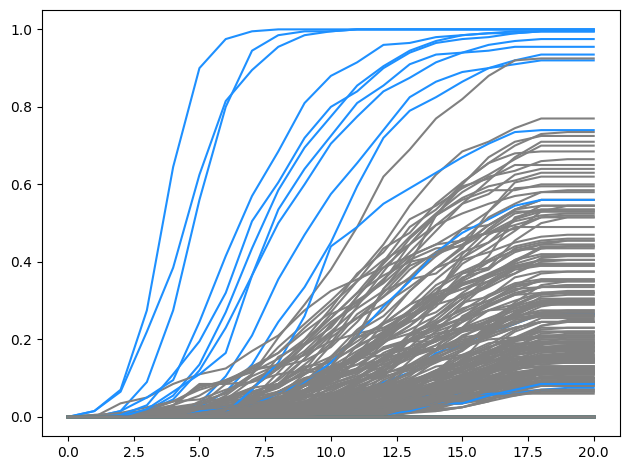

In [12]:
stability_paths = ipss_output['stability_paths']
n_alphas, p = stability_paths.shape

# blue paths for true features, gray for false features
color = ['dodgerblue' if i in true_features else 'gray' for i in range(p)]

for j in range(p):
	plt.plot(np.arange(n_alphas), stability_paths[:,j], color=color[j])
plt.tight_layout()
plt.show()